# Keshaw Choudhary EE21B069


# Assignment Week 7

## Part 1 - Simple

Write a function that takes as input the following:

- another function (note that in Python you can pass functions as arguments to other functions)
- starting point
- temperature 
- learning/decay rate

and then proceeds to apply Simulated Annealing to minimize the function.  This is more or less the same as what has been given above, but you need to encapsulate it all into a simple function and demonstrate how it works on arbitrary functions.

In [1]:
# Set up imports
%matplotlib ipympl
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation

In [2]:
def simulated_annealing(objective_function, initial_state, temperature, decay_rate):
    current_state = initial_state
    current_score = objective_function(current_state)
    best_state = current_state
    best_score = current_score
    temperature_values = [temperature]
    score_values = [current_score]
    while temperature > 1e-8:
        next_state = current_state + np.random.normal(0, temperature)
        next_score = objective_function(next_state)
        delta = next_score - current_score
        if delta < 0 or np.exp(-delta / temperature) > np.random.rand():
            current_state = next_state
            current_score = next_score
            if current_score < best_score:
                best_state = current_state
                best_score = current_score
        temperature *= decay_rate
        temperature_values.append(temperature)
        score_values.append(current_score)
    return best_state, best_score, temperature_values, score_values


In the above code implements the simulated annealing algorithm, a heuristic optimization technique that can be used to search for the global minimum of a given objective function.

The algorithm starts by initializing the current state and score to the initial state and its corresponding objective function value. It also sets the best state and score to the current values since there are no other states to compare with at the beginning. Additionally, two lists, temperature_values and score_values, are initialized to store the values of temperature and score at each iteration.

Then, the algorithm enters a loop that continues until the temperature value reaches a certain minimum threshold. At each iteration of the loop, the algorithm generates a new state by adding a random perturbation to the current state, with the magnitude of the perturbation controlled by the current temperature value. The algorithm then evaluates the objective function at the new state to obtain the corresponding score.

The algorithm then computes the difference between the current score and the new score, which is referred to as delta. If delta is negative, the new state is accepted as the current state since it represents a better solution. Otherwise, the new state is accepted with a certain probability controlled by the Metropolis criterion, which depends on the temperature value and the magnitude of delta. This step ensures that the algorithm can occasionally escape local minima.

After updating the current state and score, the algorithm checks whether the current score is better than the best score encountered so far. If it is, the current state and score are stored as the best state and score.

Finally, the temperature value is decreased by multiplying it by the decay rate. The temperature and score values at the current iteration are stored in the corresponding lists, and the loop continues until the temperature value reaches the minimum threshold.

The algorithm returns the best state, the corresponding best score, and the lists of temperature and score values at each iteration.

In [3]:
# Define the objective function to be minimized
def objective_function(x):
    return x**2 + np.sin(x)*10

bestx = -2
bestcost = objective_function(bestx)

# Set the initial state and starting temperature
initial_state = 1.0
temperature = 100.0

# Run the simulated annealing algorithm to minimize the objective function
best_state, best_score, temperature_values, score_values = simulated_annealing(objective_function, initial_state, temperature, 0.99)

# Print the best solution found
print("Best state found:", best_state)
print("Best score found:", best_score)

Best state found: -1.3067236725801308
Best score found: -7.9458229067895205


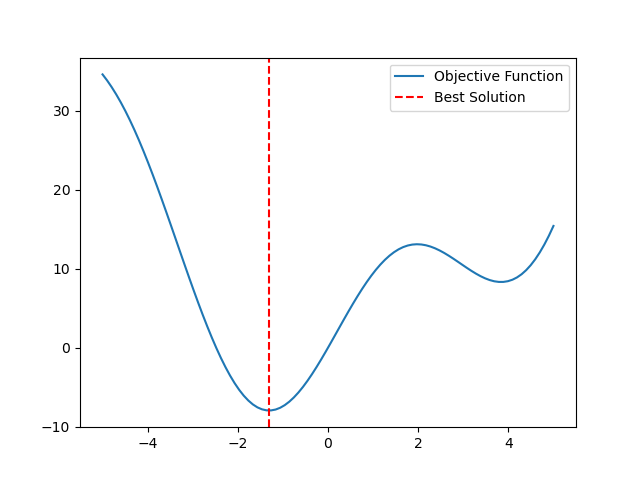

In [4]:
# Plot the objective function and the best solution found
fig, ax= plt.subplots()
x = np.linspace(-5, 5, 100)
y = objective_function(x)
plt.plot(x, y, label="Objective Function")
plt.axvline(x=best_state, color='r', linestyle='--', label="Best Solution")
plt.legend()

ani= FuncAnimation(fig, simulated_annealing, frames=range(100), interval=10, repeat=False)
plt.show()

## Part 2 

Note that part 2 is also part of the regular assignment.  It is **not** optional, but is specified as a separate problem part to break the overall problem into portions in case you find this too hard to solve at one shot.  

The traveling salesman problem gives you a set of city locations (x, y coordinates).  Your goal is to find a route from a given starting point that visits all the cities exactly once and then returns to the origin, with the minimum total distance covered (distance is measured as Euclidean distance $\sqrt{(x_2-x_1)^2 + (y_2-y_1)^2}$).  

You will be given a file where the first line is the number of cities *N*, and the next *N* lines give the cities as a list of x, y coordinates: for example
```
4
0.0 1.5
2.3 6.1
4.2 1.3
2.1 4.5
```

Your goal is to give a sequence of numbers, for example `[0 3 2 1]` which specifies the order in which to visit the cities.  Note that after the last city you will come back to the first one in the list.  

Plot the cities with the path you have specified, and output the total length of the shortest path discovered so far.

# 10 Cities

In [5]:
import numpy as np
import math
import random
import matplotlib.pyplot as plt

# Load cities from file
def load_cities(filename):
    with open(filename, 'r') as f:
        n = int(f.readline())
        cities = []
        for i in range(n):
            x, y = map(float, f.readline().split())
            cities.append((x, y))
        return cities

# Compute Euclidean distance between two cities
def distance(city1, city2):
    x1, y1 = city1
    x2, y2 = city2
    return math.sqrt((x2 - x1)**2 + (y2 - y1)**2)

# Compute the total distance of a given tour
def tour_distance(tour, cities):
    return sum(distance(cities[tour[i]], cities[tour[(i+1) % len(tour)]]) for i in range(len(tour)))



In [15]:
# Simulated Annealing algorithm
def simulated_annealing(cities, initial_temperature, cooling_factor, stopping_temperature, iterations):
    # Initialize tour to random ordering of cities
    current_tour = list(range(len(cities)))
    random.shuffle(current_tour)

    # Initialize temperature
    temperature = initial_temperature

    # Track best tour and its length
    best_tour = current_tour
    best_distance = tour_distance(current_tour, cities)

    # Annealing loop
    while temperature > stopping_temperature:
        for i in range(iterations):
            # Choose two cities to swap
            i, j = sorted(random.sample(range(len(cities)), 2))

            # Compute the change in distance
            delta_distance = (
                distance(cities[current_tour[i-1]], cities[current_tour[j]]) + 
                distance(cities[current_tour[i]], cities[current_tour[(j+1) % len(cities)]] ) - 
                distance(cities[current_tour[i-1]], cities[current_tour[i]]) -
                distance(cities[current_tour[j]], cities[current_tour[(j+1) % len(cities)]] ))
            
            # Accept or reject the new tour based on temperature and delta distance
            if delta_distance < 0 or math.exp(-delta_distance / temperature) > random.random():
                current_tour[i:j+1] = reversed(current_tour[i:j+1])

            # Update best tour
            current_distance = tour_distance(current_tour, cities)
            if current_distance < best_distance:
                best_tour = current_tour
                best_distance = current_distance

        # Update temperature
        temperature *= cooling_factor

    return best_tour, best_distance

This code is implementing the Simulated Annealing algorithm, which is a heuristic optimization algorithm used to find a good solution to the Traveling Salesman Problem (TSP).

The input parameters to the algorithm are: cities: a list of (x, y) coordinates representing the locations of the cities , initial_temperature: the initial temperature for the annealing process, cooling _factor: the factor by which the temperature is reduced in each iteration, stopping_temperature: the minimum temperature at which the annealing process stops, and iterations: the number of iterations to perform at each temperature.

To create the current tour, the program first shuffles the order of the cities at random. It then sets the temperature to zero and keeps track of the best tour's length.

By randomly switching the order of two cities, the primary annealing loop iteratively alters the current tour and calculates the change in distance as a consequence. Based on the change in distance and the temperature, the algorithm decides whether to approve or reject the new trip. It is always acceptable if the new tour is superior to the present tour. Depending on the temperature and the size of the distance difference, it is more likely to be accepted if the new route is worse.

The program multiplies the temperature by the cooling factor at the conclusion of each temperature iteration to update the temperature. When the temperature drops below the stopping temperature, the algorithm stops.

The best tour and its length, which is the tour with the shortest distance discovered during the annealing phase, are the algorithm's outputs.

In [7]:
# Load cities from file
cities = load_cities("city_10.txt")

# Run simulated annealing algorithm
initial_temperature = 1e5
cooling_factor = 0.99
stopping_temperature = 1e-8
iterations = 10
best_tour, best_distance = simulated_annealing(cities, initial_temperature, cooling_factor, stopping_temperature, iterations)


In [8]:
# Print best tour and its length
print(f"Best tour: {best_tour}")
print(f"Tour length: {best_distance}")

Best tour: [0, 6, 5, 4, 3, 1, 7, 9, 8, 2]
Tour length: 34.07656139463668


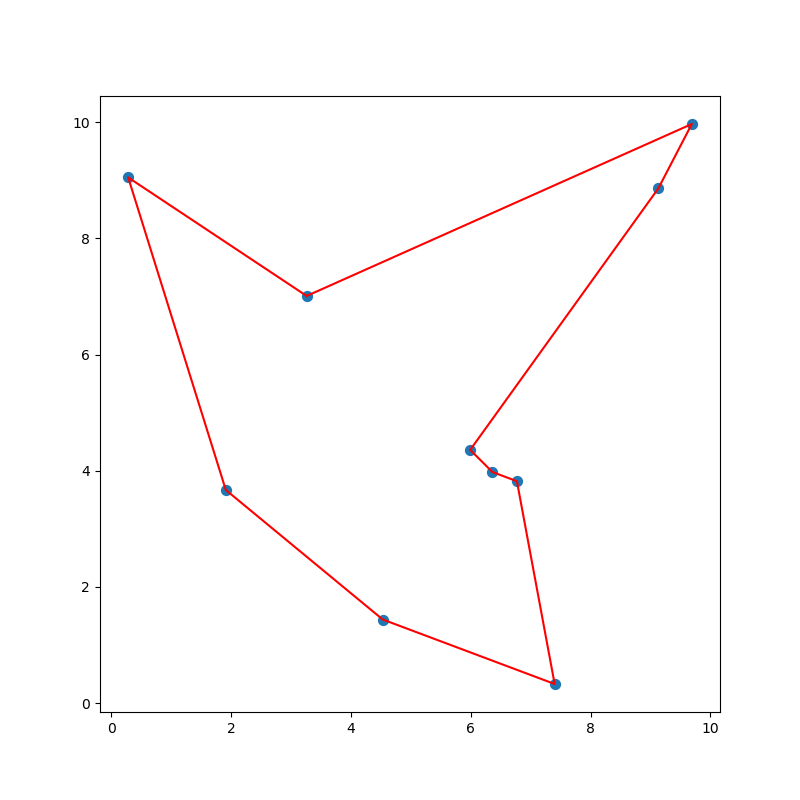

In [9]:
# Plot the cities and best tour
plt.figure(figsize=(8,8))
x = [c[0] for c in cities]
y = [c[1] for c in cities]
plt.scatter(x, y, s=50)
plt.plot([cities[best_tour[i % len(cities)]][0] for i in range(len(best_tour)+1)],
         [cities[best_tour[i % len(cities)]][1] for i in range(len(best_tour)+1)], 'r-')

 The x-coordinates of the cities in the tour are obtained by indexing the list of cities with the indices of the cities in the best tour, and extracting the first element of the resulting list of (x,y) coordinates. The y-coordinates are obtained in a similar way by extracting the second element of the (x,y) coordinates.

# 100 cities

In [10]:
# Load cities from file
def load_cities(filename):
    with open(filename, 'r') as f:
        n = int(f.readline())
        cities = []
        for i in range(n):
            x, y = map(float, f.readline().split())
            cities.append((x, y))
        return cities

# Compute Euclidean distance between two cities
def distance(city1, city2):
    x1, y1 = city1
    x2, y2 = city2
    return math.sqrt((x2 - x1)**2 + (y2 - y1)**2)

# Compute the total distance of a given tour
def tour_distance(tour, cities):
    return sum(distance(cities[tour[i]], cities[tour[(i+1) % len(tour)]]) for i in range(len(tour)))


In [11]:
# Simulated Annealing algorithm
def simulated_annealing(cities, initial_temperature, cooling_factor, stopping_temperature, iterations):
    # Initialize tour to random ordering of cities
    current_tour = list(range(len(cities)))
    random.shuffle(current_tour)

    # Initialize temperature
    temperature = initial_temperature

    # Track best tour and its length
    best_tour = current_tour
    best_distance = tour_distance(current_tour, cities)

    # Annealing loop
    while temperature > stopping_temperature:
        for i in range(iterations):
            # Choose two cities to swap
            i, j = sorted(random.sample(range(len(cities)), 2))

            # Compute the change in distance
            delta_distance = (
                distance(cities[current_tour[i-1]], cities[current_tour[j]]) + 
                distance(cities[current_tour[i]], cities[current_tour[(j+1) % len(cities)]] ) - 
                distance(cities[current_tour[i-1]], cities[current_tour[i]]) -
                distance(cities[current_tour[j]], cities[current_tour[(j+1) % len(cities)]] ))
            
            # Accept or reject the new tour based on temperature and delta distance
            if delta_distance < 0 or math.exp(-delta_distance / temperature) > random.random():
                current_tour[i:j+1] = reversed(current_tour[i:j+1])

            # Update best tour
            current_distance = tour_distance(current_tour, cities)
            if current_distance < best_distance:
                best_tour = current_tour
                best_distance = current_distance

        # Update temperature
        temperature *= cooling_factor

    return best_tour, best_distance

This code is implementing the Simulated Annealing algorithm, which is a heuristic optimization algorithm used to find a good solution to the Traveling Salesman Problem (TSP).

The input parameters to the algorithm are: cities: a list of (x, y) coordinates representing the locations of the cities , initial_temperature: the initial temperature for the annealing process, cooling _factor: the factor by which the temperature is reduced in each iteration, stopping_temperature: the minimum temperature at which the annealing process stops, and iterations: the number of iterations to perform at each temperature.

To create the current tour, the program first shuffles the order of the cities at random. It then sets the temperature to zero and keeps track of the best tour's length.

By randomly switching the order of two cities, the primary annealing loop iteratively alters the current tour and calculates the change in distance as a consequence. Based on the change in distance and the temperature, the algorithm decides whether to approve or reject the new trip. It is always acceptable if the new tour is superior to the present tour. Depending on the temperature and the size of the distance difference, it is more likely to be accepted if the new route is worse.

The program multiplies the temperature by the cooling factor at the conclusion of each temperature iteration to update the temperature. When the temperature drops below the stopping temperature, the algorithm stops.

The best tour and its length, which is the tour with the shortest distance discovered during the annealing phase, are the algorithm's outputs.

In [12]:
# Load cities from file
cities = load_cities("city_100.txt")

# Run simulated annealing algorithm
initial_temperature = 1e5
cooling_factor = 0.99
stopping_temperature = 1e-8
iterations = 10
best_tour, best_distance = simulated_annealing(cities, initial_temperature, cooling_factor, stopping_temperature, iterations)


In [13]:
# Print best tour and its length
print(f"Best tour: {best_tour}")
print(f"Tour length: {best_distance}")

Best tour: [37, 11, 9, 66, 20, 83, 43, 69, 35, 77, 91, 28, 64, 96, 73, 29, 97, 54, 21, 22, 3, 55, 31, 53, 59, 71, 90, 16, 88, 76, 6, 36, 80, 18, 99, 93, 14, 27, 7, 65, 52, 0, 34, 17, 41, 4, 89, 2, 5, 67, 10, 78, 26, 8, 40, 94, 61, 60, 38, 63, 95, 39, 19, 30, 25, 86, 15, 50, 42, 84, 12, 57, 72, 92, 87, 24, 74, 45, 56, 47, 68, 51, 49, 48, 75, 58, 82, 46, 98, 13, 23, 85, 62, 33, 32, 79, 70, 1, 44, 81]
Tour length: 89.93901847011513


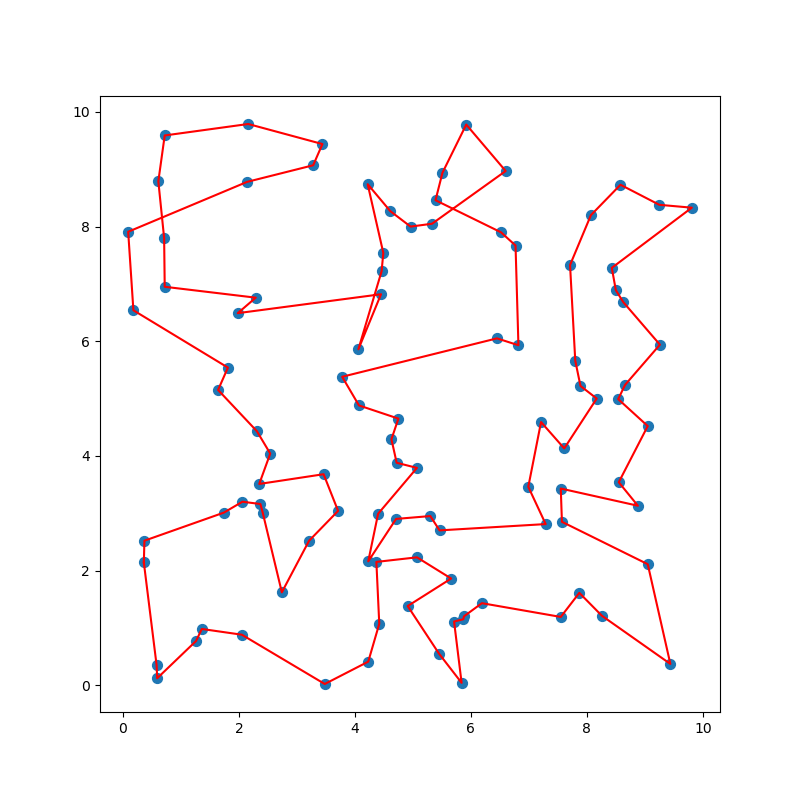

In [14]:
# Plot the cities and best tour
plt.figure(figsize=(8,8))
x = [c[0] for c in cities]
y = [c[1] for c in cities]
plt.scatter(x, y, s=50)
plt.plot([cities[best_tour[i % len(cities)]][0] for i in range(len(best_tour)+1)],
         [cities[best_tour[i % len(cities)]][1] for i in range(len(best_tour)+1)], 'r-')

 The x-coordinates of the cities in the tour are obtained by indexing the list of cities with the indices of the cities in the best tour, and extracting the first element of the resulting list of (x,y) coordinates. The y-coordinates are obtained in a similar way by extracting the second element of the (x,y) coordinates.